In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('heart.csv',sep='\t',)

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values

In [7]:
ind =df[df.duplicated()].index

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(302, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


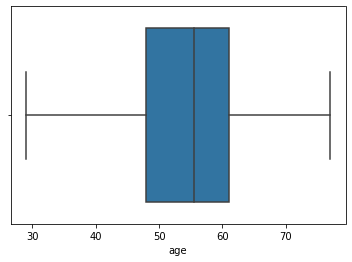

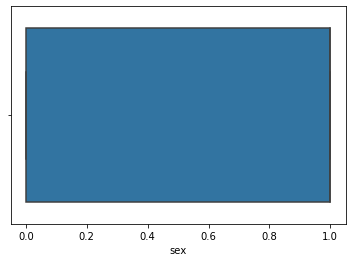

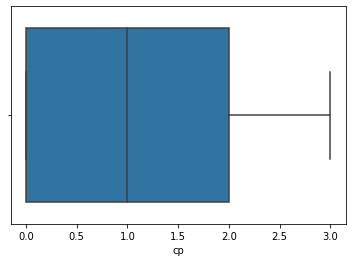

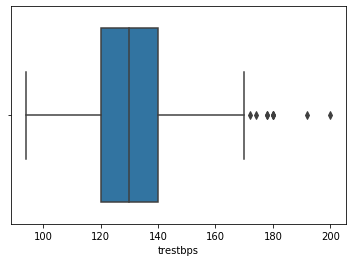

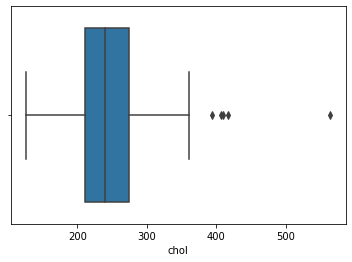

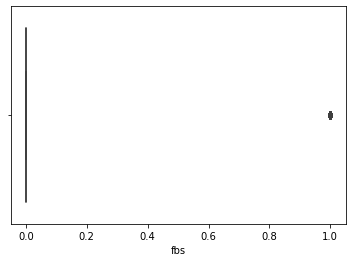

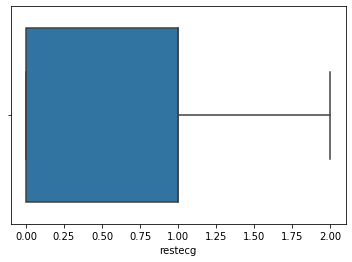

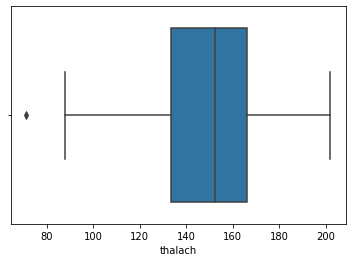

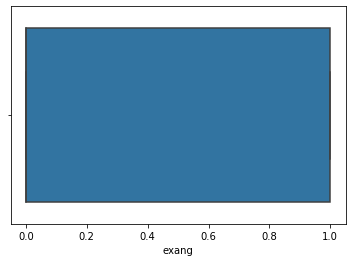

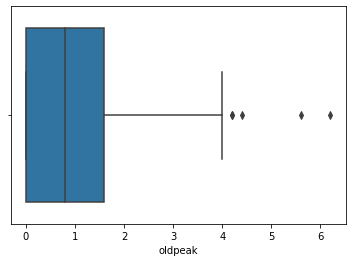

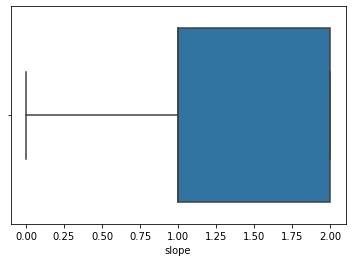

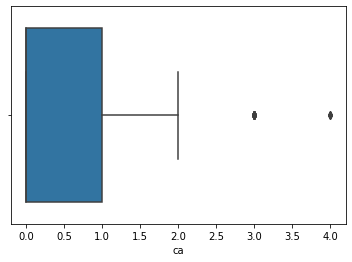

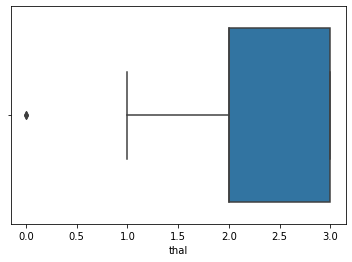

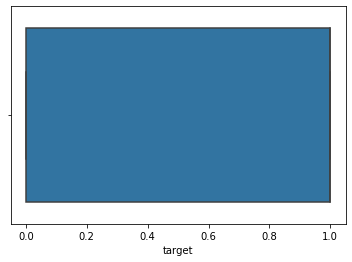

In [11]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.show()

There are few ouliers in each.

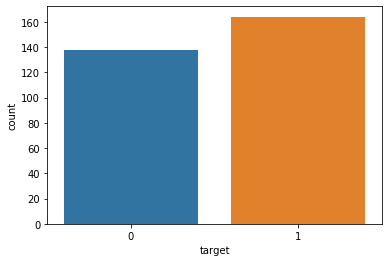

In [12]:
sns.countplot(df.target)

In [13]:
df.target.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

the target is in 54 % for heart patients and 45% for no heart patients. which looks like  not a imbalanced dataset.

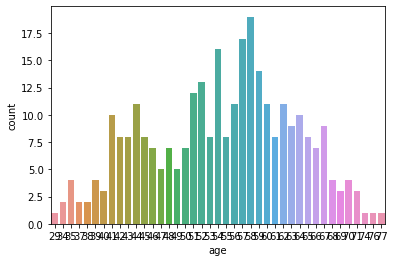

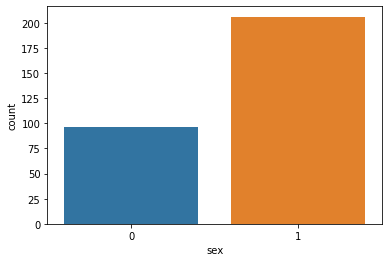

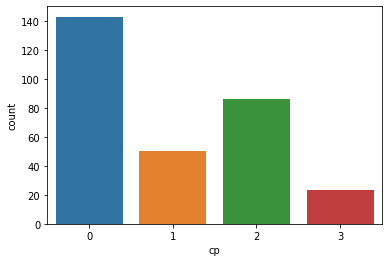

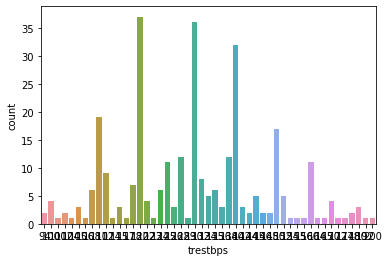

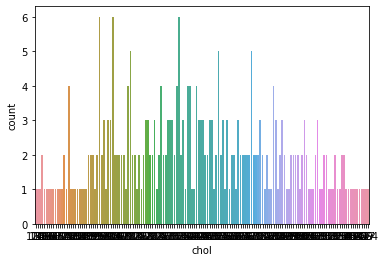

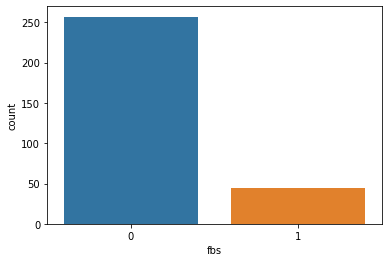

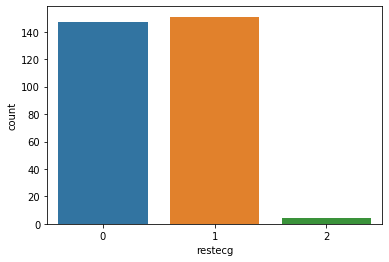

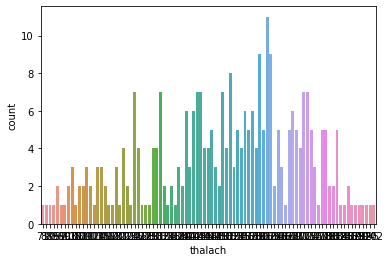

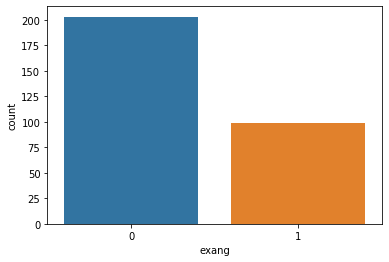

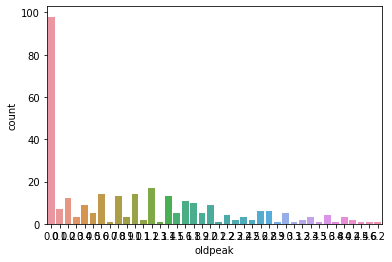

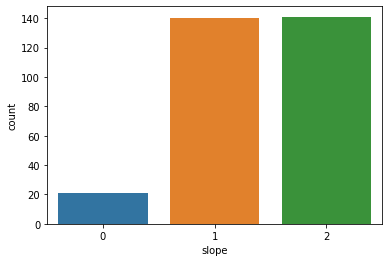

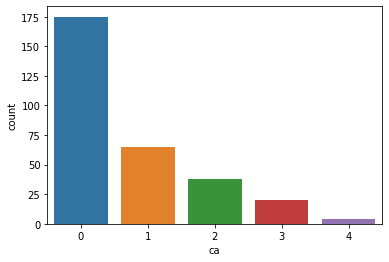

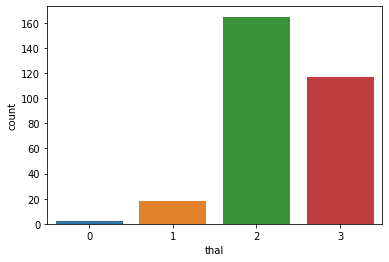

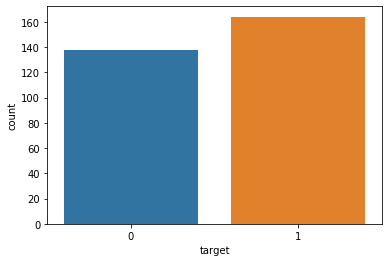

In [14]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.countplot(df[i],)
    plt.show()

The counts of different all variables.

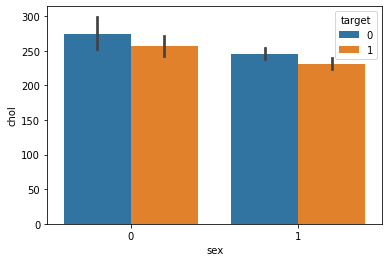

In [15]:
sns.barplot(x='sex',y ='chol' ,hue ='target' ,data =df )

In [16]:
k =df[df.sex==0 ]
s =k[k.target ==0]['chol']
np.mean(s)

274.9583333333333

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


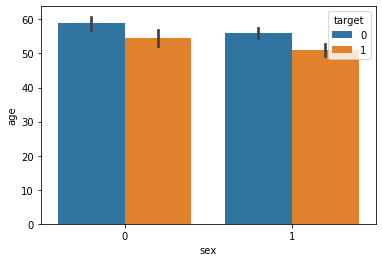

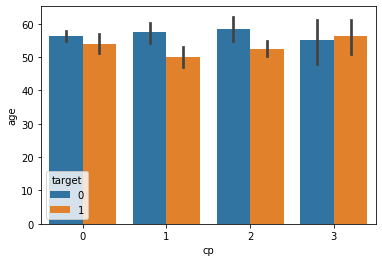

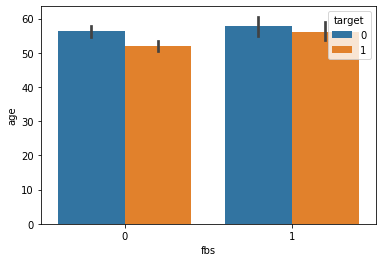

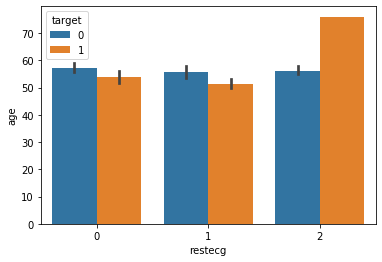

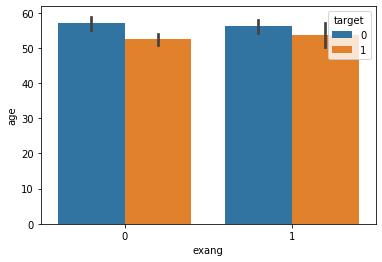

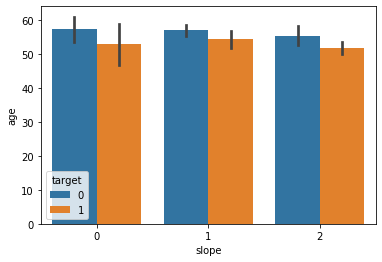

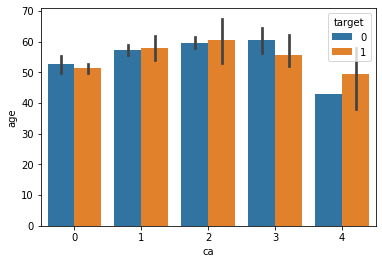

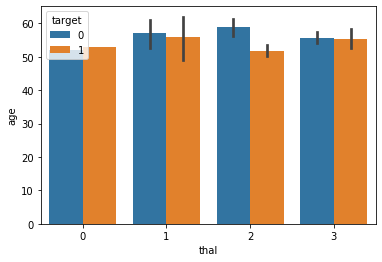

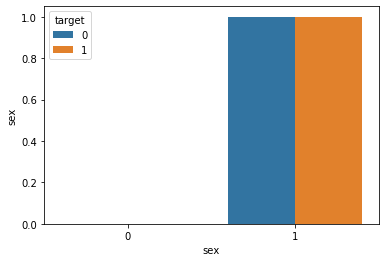

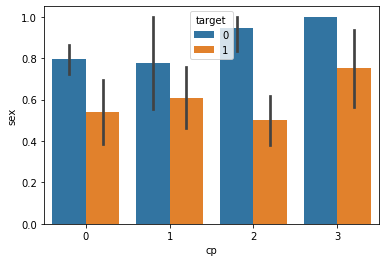

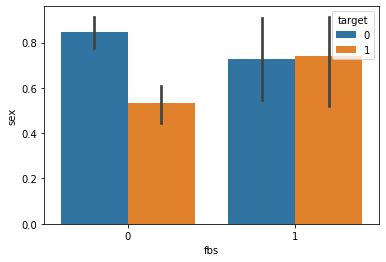

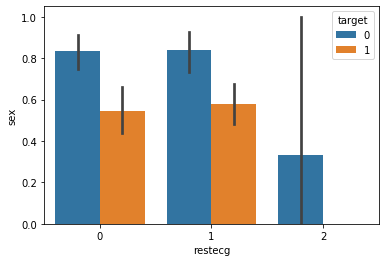

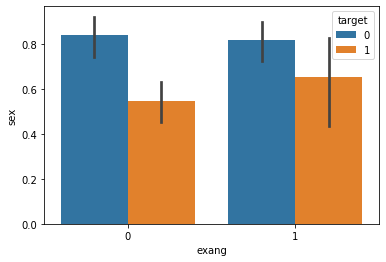

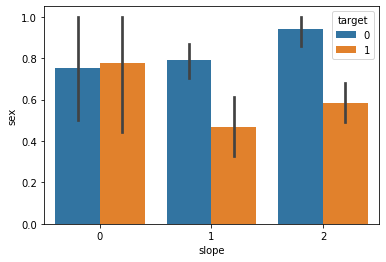

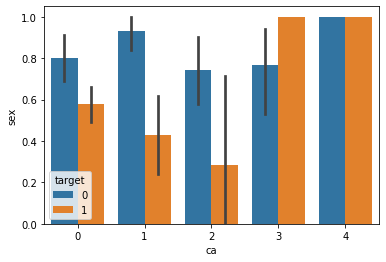

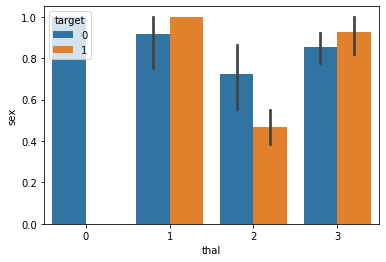

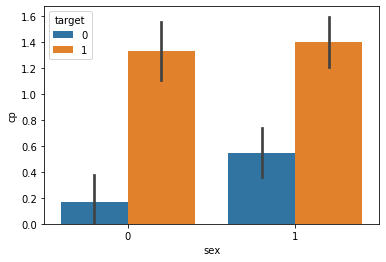

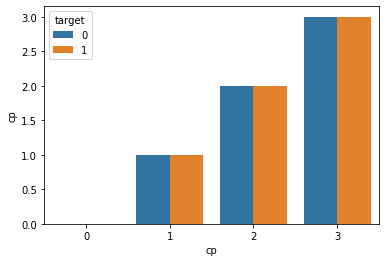

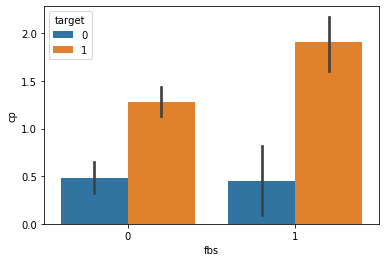

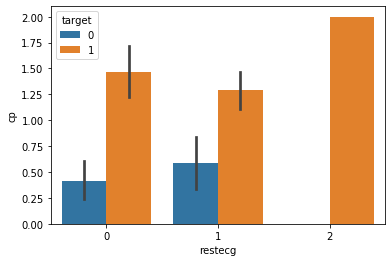

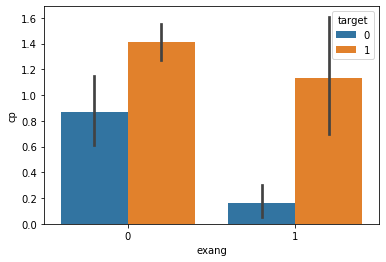

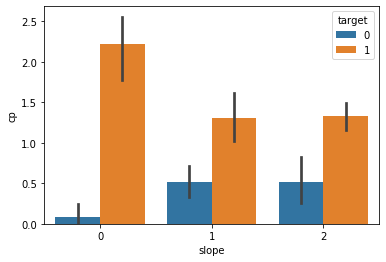

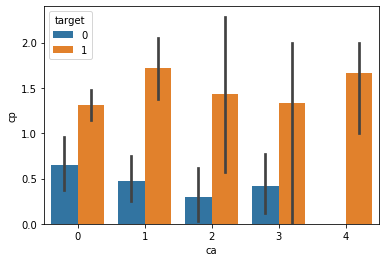

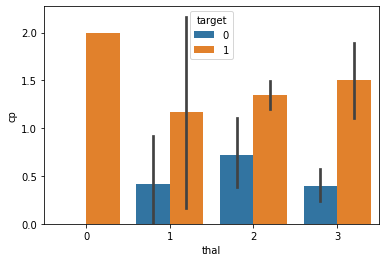

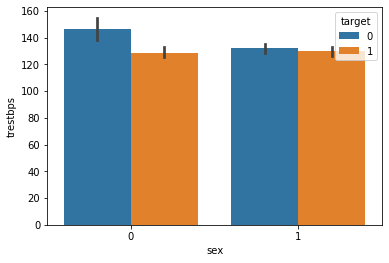

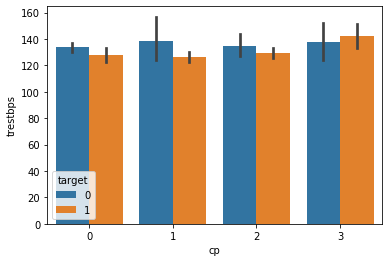

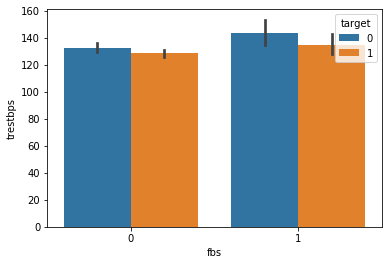

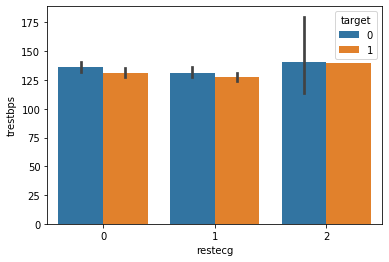

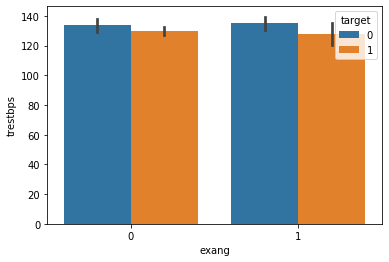

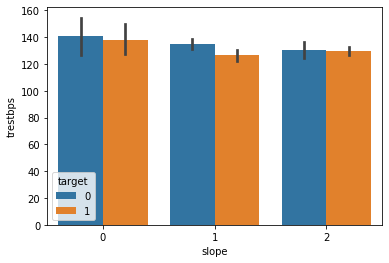

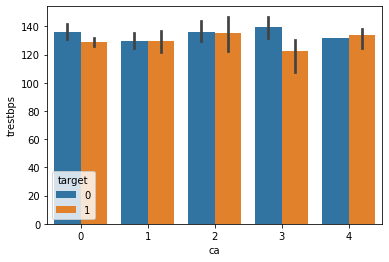

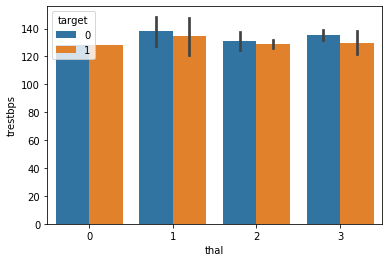

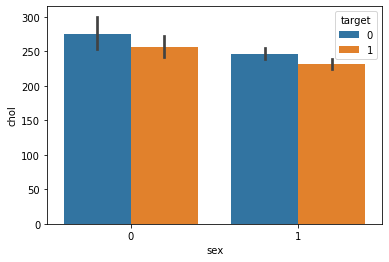

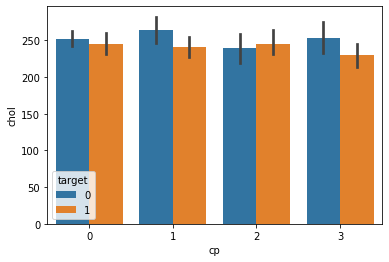

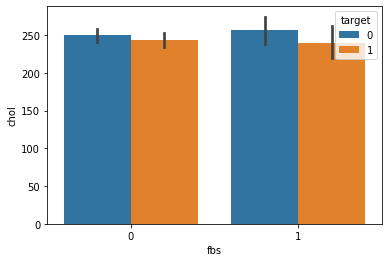

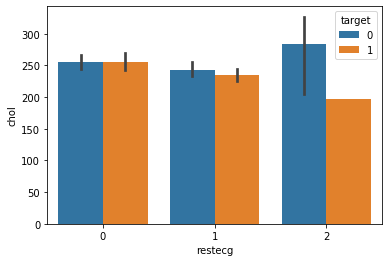

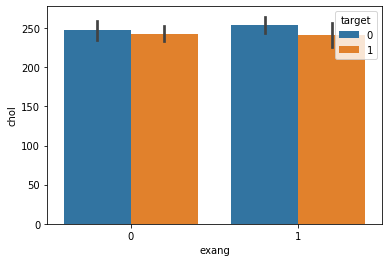

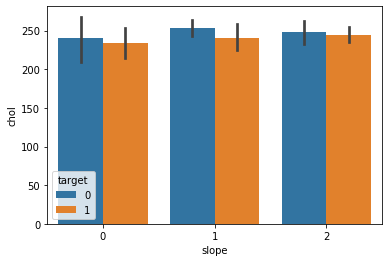

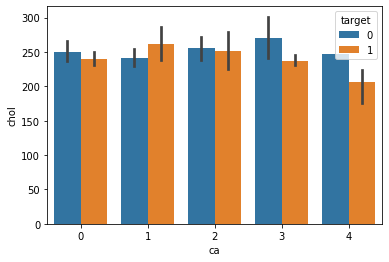

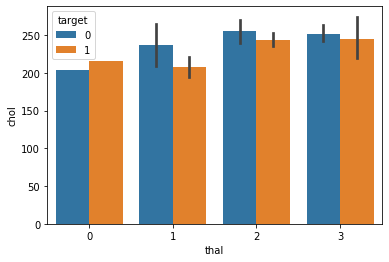

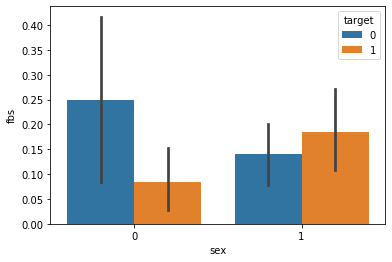

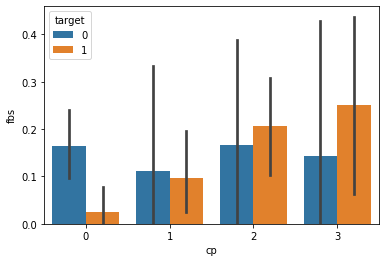

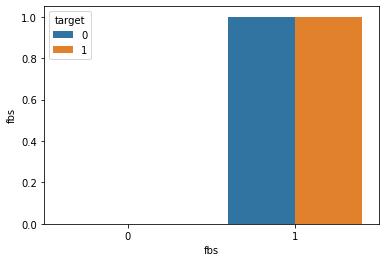

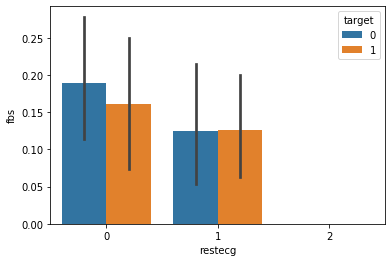

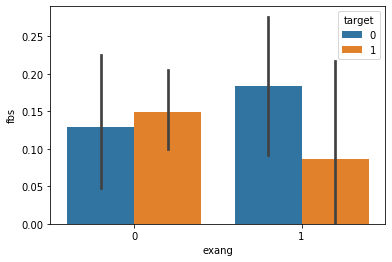

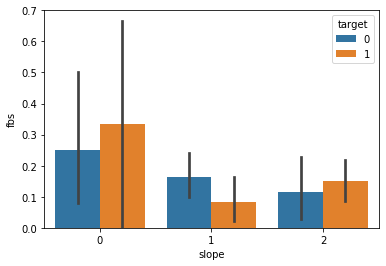

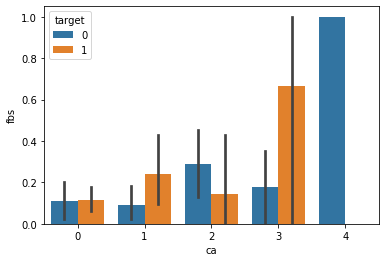

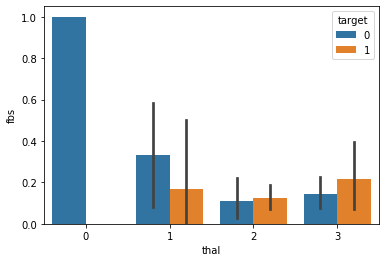

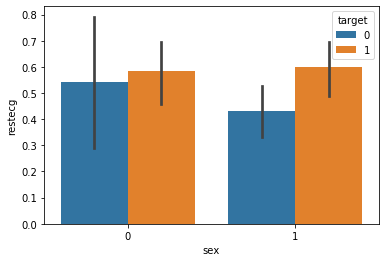

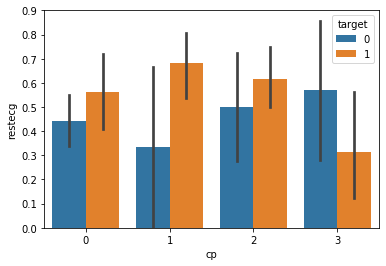

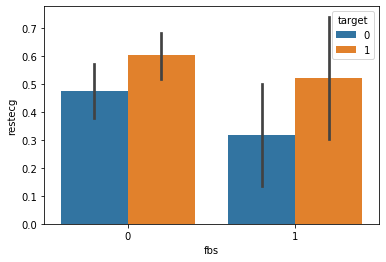

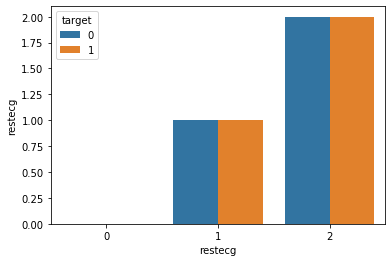

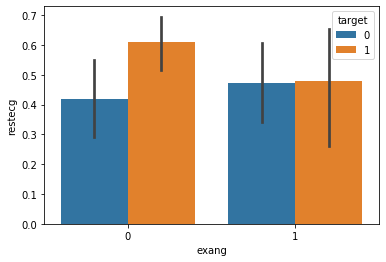

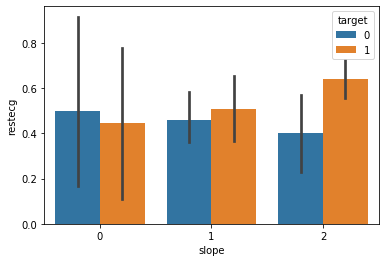

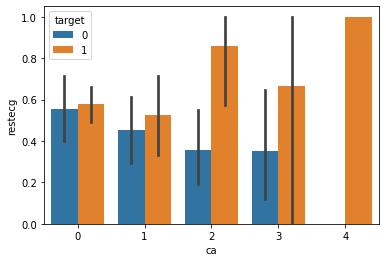

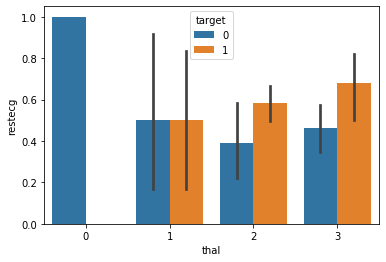

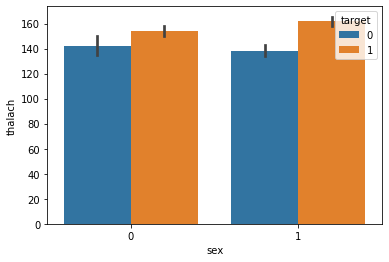

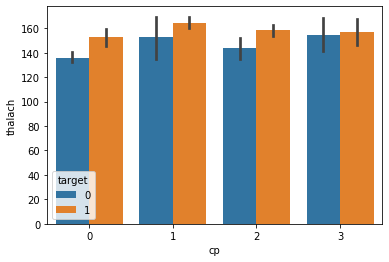

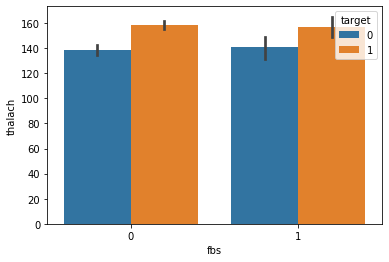

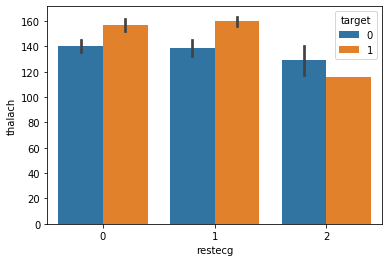

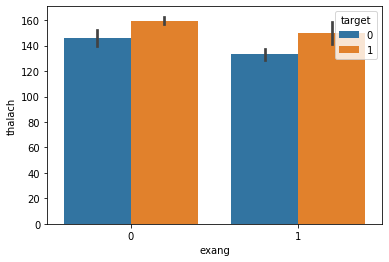

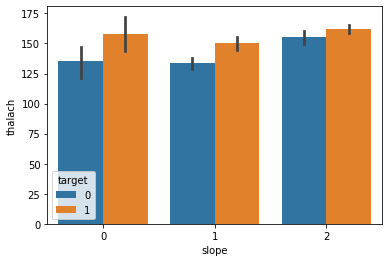

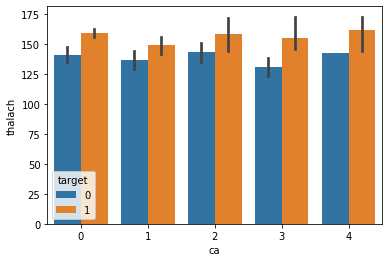

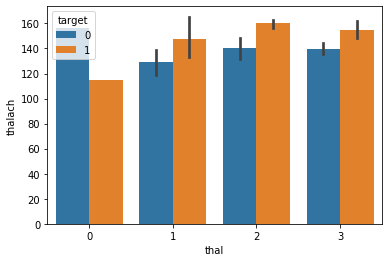

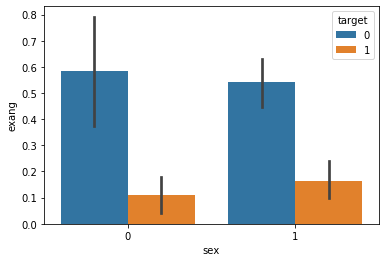

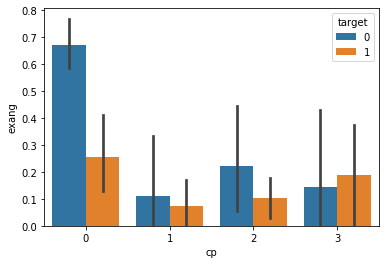

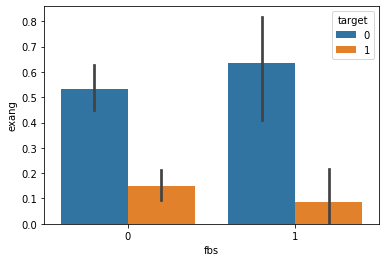

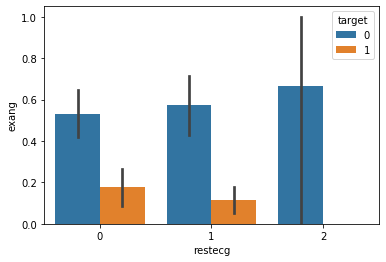

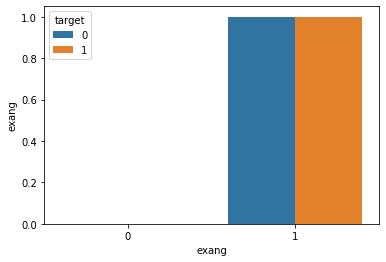

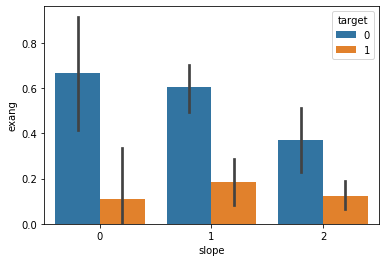

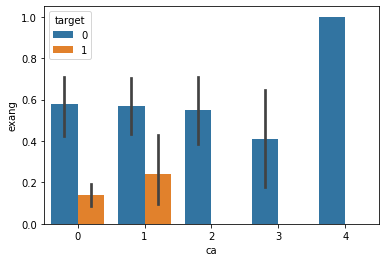

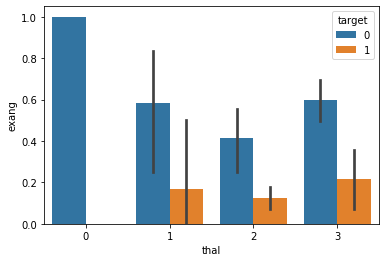

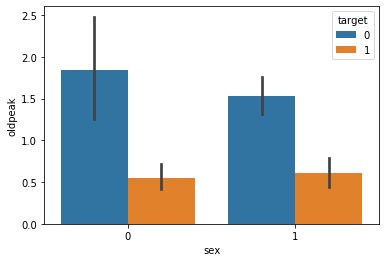

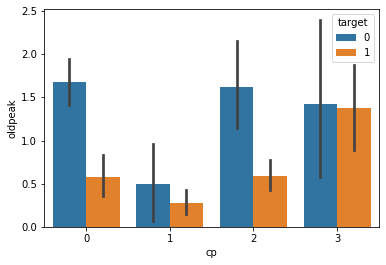

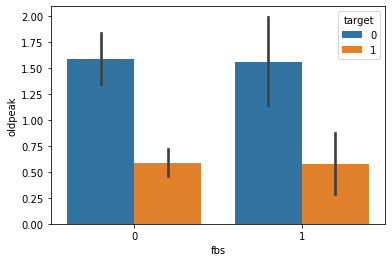

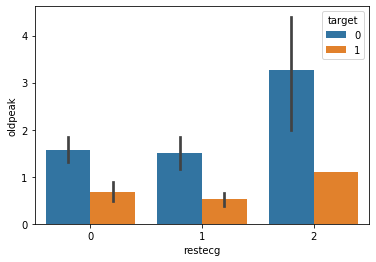

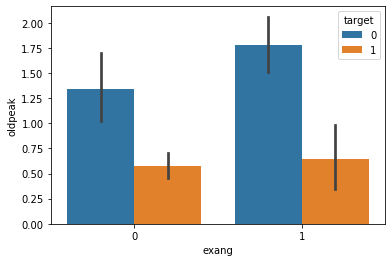

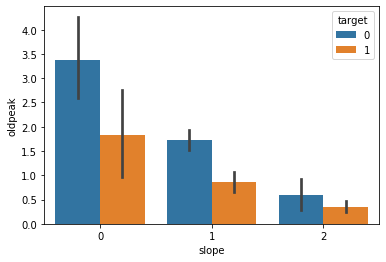

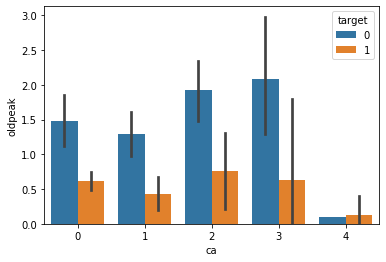

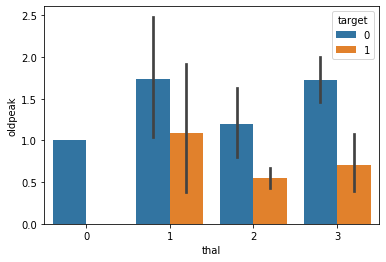

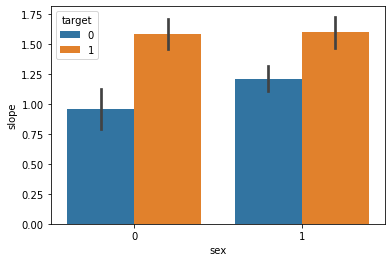

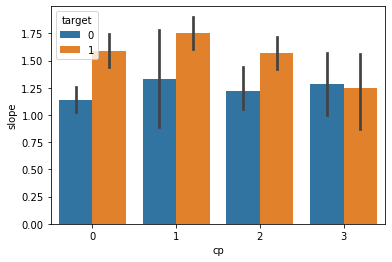

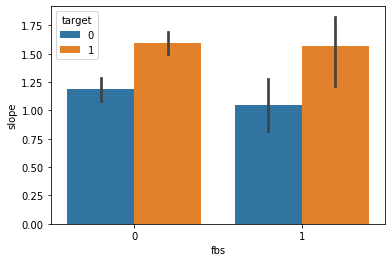

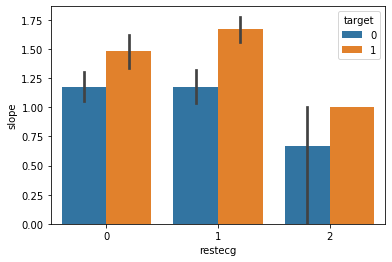

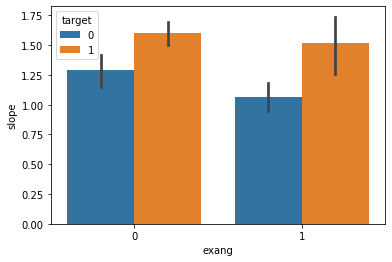

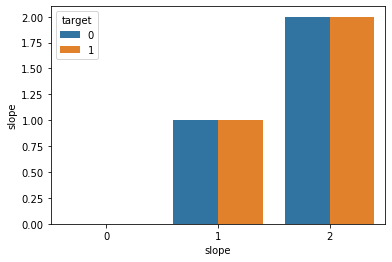

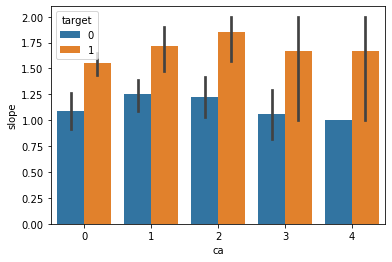

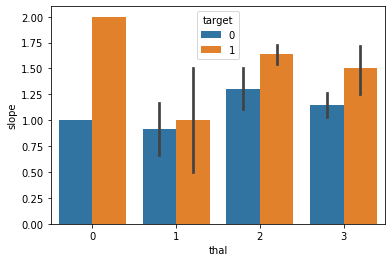

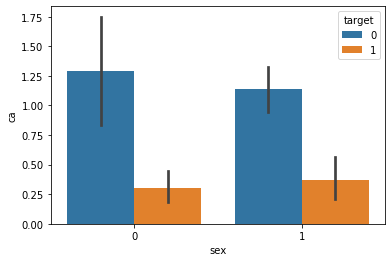

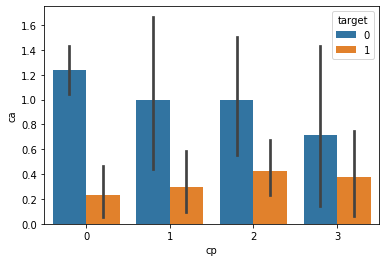

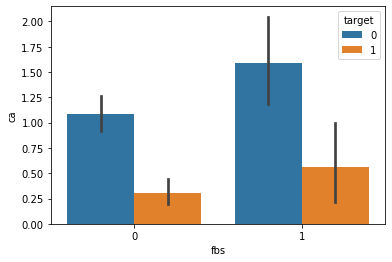

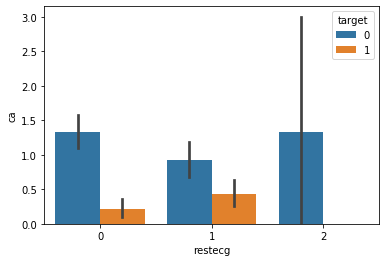

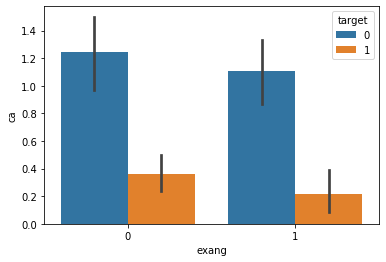

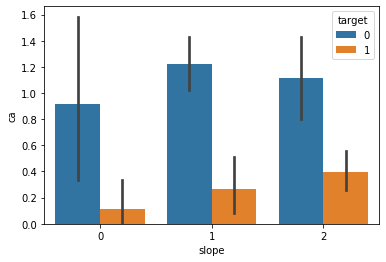

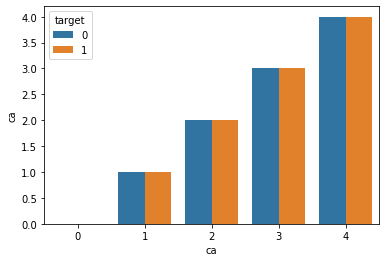

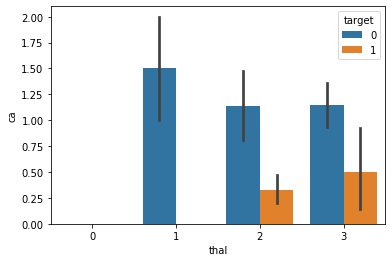

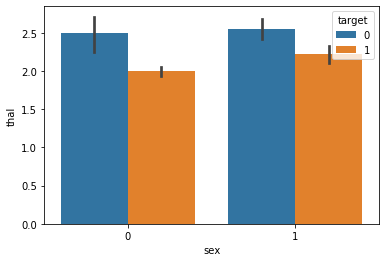

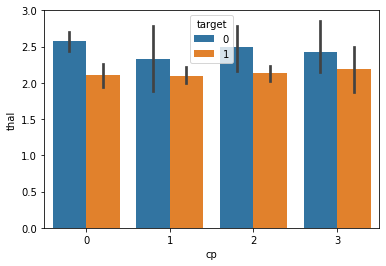

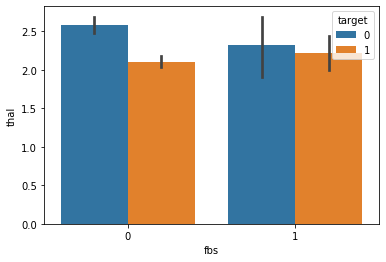

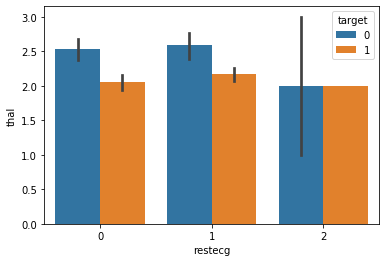

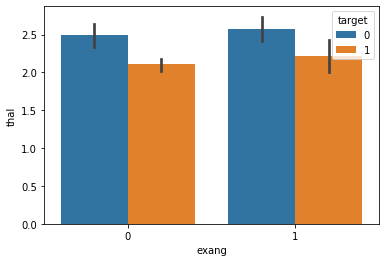

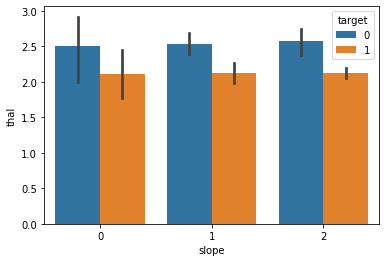

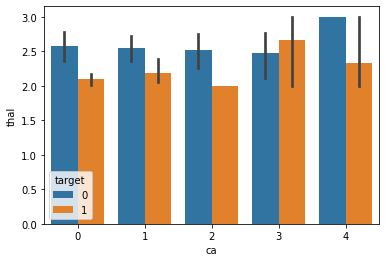

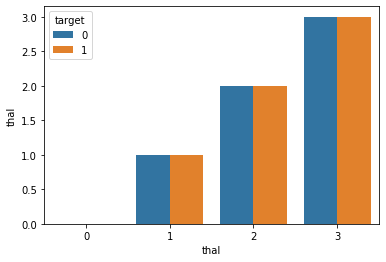

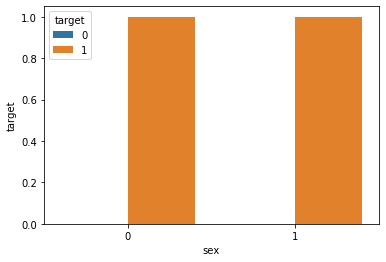

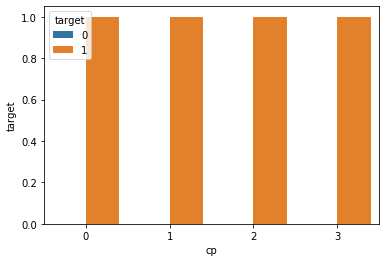

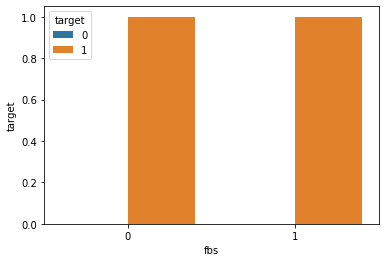

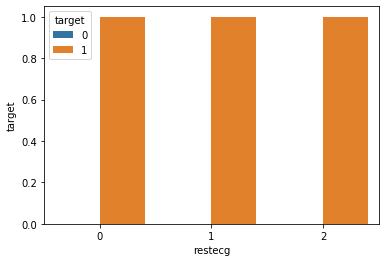

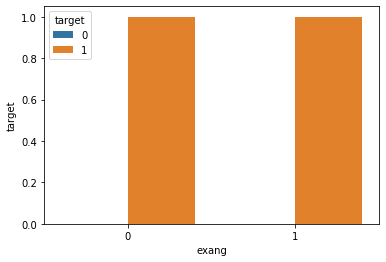

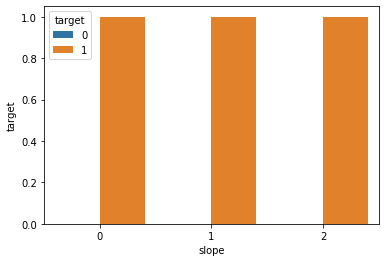

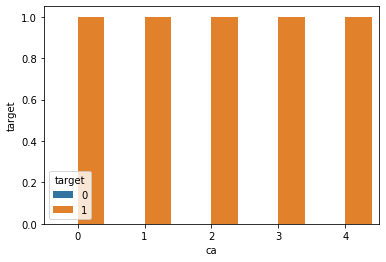

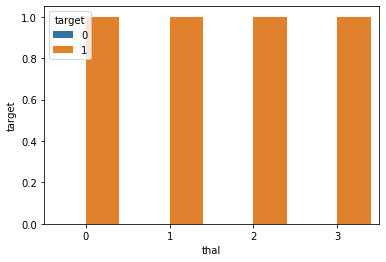

In [18]:
for i in df.select_dtypes(include=['int64','float64']):
    for j in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
        
        sns.barplot(x= j,y = i ,hue ='target' ,data =df )
        plt.show() 

The mean age of females having heart disease is 58
we will get the mean values for the continious variables and count for descrete values.

In [19]:
x = df.drop(columns='target')
y = df.target

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## stats

In [21]:
import statsmodels.api as sm

xc = sm.add_constant(x)
model = sm.Logit(y,xc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Mon, 24 Feb 2020   Pseudo R-squ.:                  0.4949
Time:                        22:39:58   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3042      2.578      1.282      0.200      -1.748       8.357
age           -0.0015      0.023     -0.063      0.950      -0.047       0.045
sex           -1.7509      0.468     -3.740      0.000      -2.669      -0.833
cp             0.8473      0.186      4.566      0.000       0.484       1.211
trestbps      -0.0202      0.010     -1.944      0.052      -0.041       0.000
chol          -0.0045      0.004     -1.179      0.238      -0.012       0.003
fbs            0.0735      0.532      0.138      0.890      -0.970       1.117
restecg        0.4506      0.349      1.293      0.196      -0.232       1.134
thalach        0.0231      0.010      2.214      0.027       0.003       0.044
exang         -0.9810      0.410     -2.394      0.017      -1.784      -0.178
oldpeak       -0.5236      0.214     -2.441      0.015      -0.944      -0.103
slope          0.5891      0.350      1.684      0.092      -0.097       1.275
ca            -0.8260      0.202     -4.091      0.000      -1.222      -0.430
thal          -0.8872      0.291     -3.052      0.002      -1.457      -0.317
==============================================================================
"""

## vif test for checking multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifff = pd.DataFrame()

vifff['factors'] =[vif(xc.values,i) for i in range(xc.shape[1])]
vifff["features"] = xc.columns
vifff

,factors,features
0,206.849595,const
1,1.451248,age
2,1.160169,sex
3,1.286502,cp
4,1.175290,trestbps
5,1.146067,chol
6,1.090649,fbs
7,1.060030,restecg
8,1.608295,thalach
9,1.399794,exang


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
ytrainprob =LR.predict_proba(X_train)
ypredict =LR.predict(X_train)

In [25]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)


Train accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.8861386138613861
Test accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.82
rou_auc_score 0.9418593212001968
rou_auc_score 0.8771929824561403
Train classification report 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        95
           1       0.86      0.94      0.90       107

    accuracy

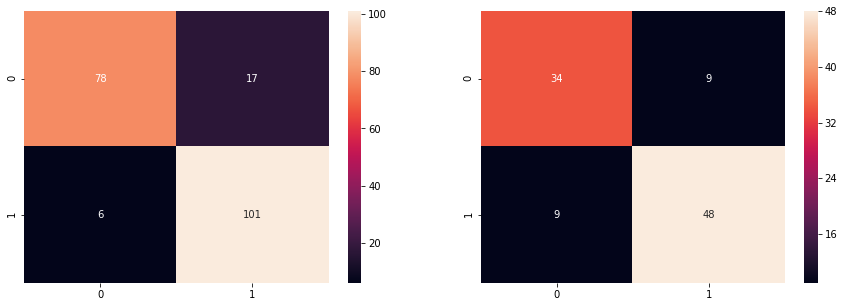

roc curve for Train


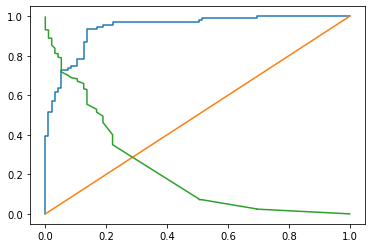

roc curve for Test


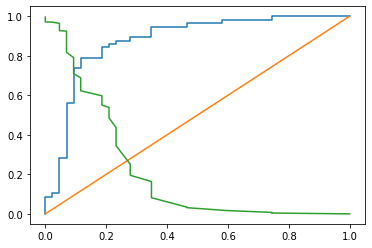

In [26]:
evaluation_train_test(LR,X_train,y_train,X_test,y_test)

## Randomsearch for Logistic Regression

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

Train accuracy score of LogisticRegression(C=0.8850507407351311, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.8861386138613861
Test accuracy score of  LogisticRegression(C=0.8850507407351311, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.83
rou_auc_score 0.9415641908509592
rou_auc_score 0.8722970216238269
Train classification report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        95
           1       0.86      0.93    

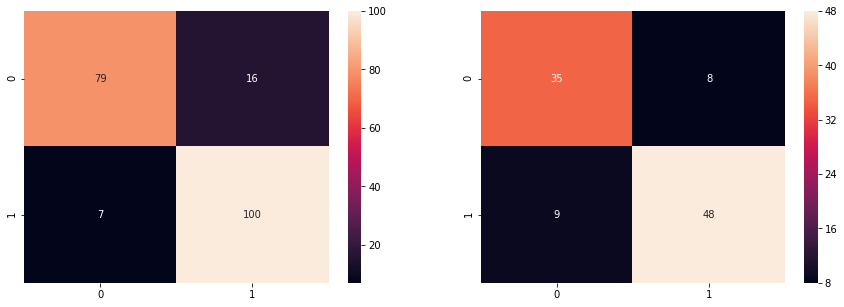

roc curve for Train


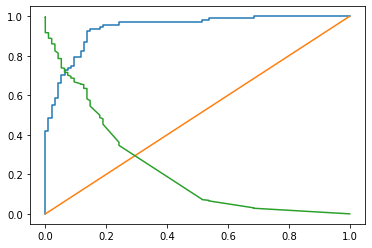

roc curve for Test


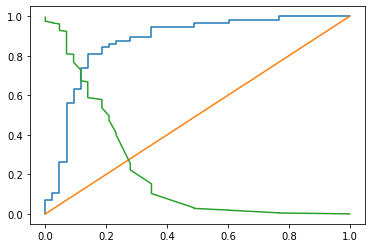

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
rsearch = RandomizedSearchCV(LR, hyperparameters, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearch.fit(x, y)
par = rsearch.best_params_

LR1 =LogisticRegression(**par)
LR1.fit(X_train,y_train)
evaluation_train_test(LR1,X_train,y_train,X_test,y_test)


## Naive bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB
nb =BernoulliNB()
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Train accuracy score of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) : 0.806930693069307
Test accuracy score of  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) : 0.79
rou_auc_score 0.9103787506148548
rou_auc_score 0.8816809465524275
Train classification report 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.84      0.79      0.81       107

    accuracy                           0.81       202
   macro avg       0.81      0.81      0.81       202
weighted avg       0.81      0.81      0.81       202

Test classification report 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        43
           1       0.85      0.77      0.81        57

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



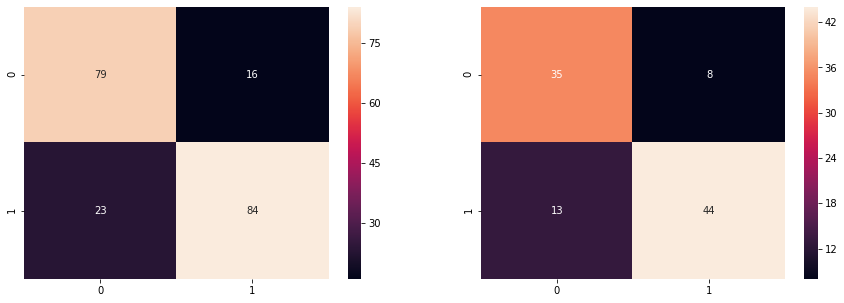

roc curve for Train


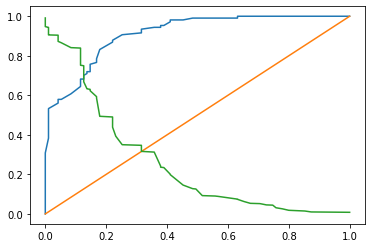

roc curve for Test


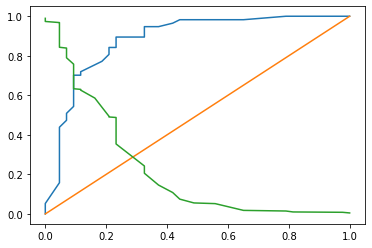

In [29]:
evaluation_train_test(nb,X_train,y_train,X_test,y_test)

# knn 

In [30]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X_traink =ss.fit_transform(X_train)
X_testk =ss.transform(X_test)

Train accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform') : 0.6188118811881188
Test accuracy score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform') : 0.83
rou_auc_score 0.6129857353664535
rou_auc_score 0.9035087719298246
Train classification report 
               precision    recall  f1-score   support

           0       0.72      0.31      0.43        95
           1       0.59      0.90      0.71       107

    accuracy                           0.62       202
   macro avg       0.66      0.60      0.57       202
weighted avg       0.65      0.62      0.58       202

Test classification report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.

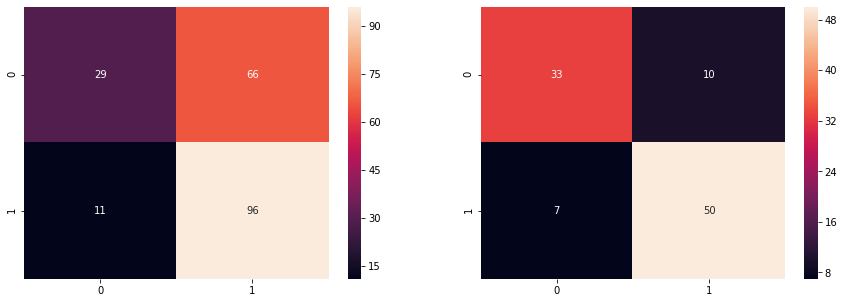

roc curve for Train


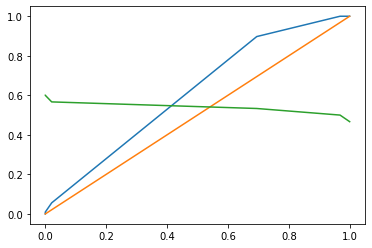

roc curve for Test


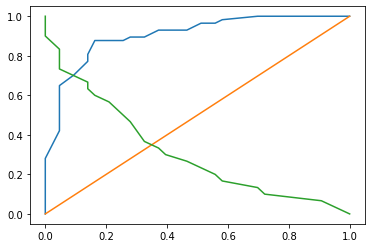

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=30)
knn.fit(X_traink,y_train)
evaluation_train_test(knn,X_train,y_train,X_testk,y_test)

Train accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=1,
                     weights='uniform') : 0.7029702970297029
Test accuracy score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=1,
                     weights='uniform') : 0.7
rou_auc_score 0.7883915395966552
rou_auc_score 0.766421868625051
Train classification report 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66        95
           1       0.70      0.78      0.73       107

    accuracy                           0.70       202
   macro avg       0.70      0.70      0.70       202
weighted avg       0.70      0.70      0.70       202

Test classification report 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65

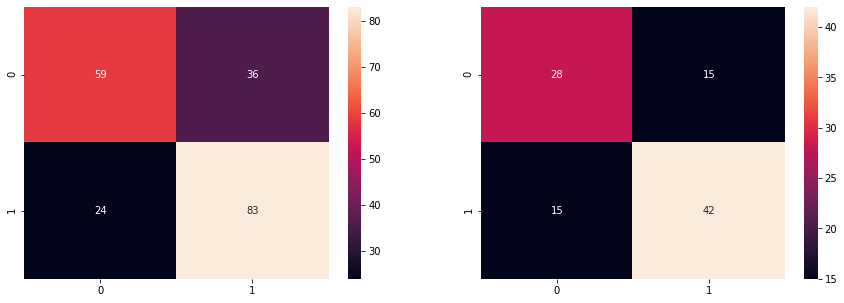

roc curve for Train


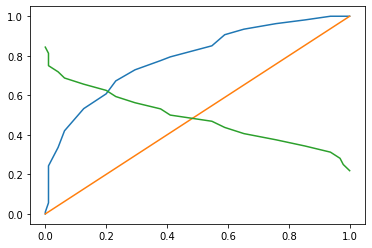

roc curve for Test


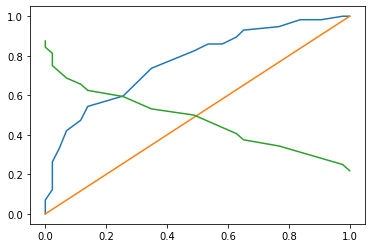

In [32]:
from scipy.stats import randint
params = {
    'n_neighbors': randint(2,40),
    'p': randint(1,5),
}

knnsearch1   = RandomizedSearchCV(knn,params,cv =3,scoring = 'roc_auc',n_jobs =-1,n_iter =100)
knnsearch1.fit(x,y)
knnsearch1.best_params_

knn1 =KNeighborsClassifier(**knnsearch1.best_params_)
knn1.fit(X_train,y_train)
evaluation_train_test(knn1,X_train,y_train,X_test,y_test)



# Decision Tree

Train accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 1.0
Test accuracy score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.81
rou_auc_score 1.0
rou_auc_score 0.810485516115871
Train classification report 
      

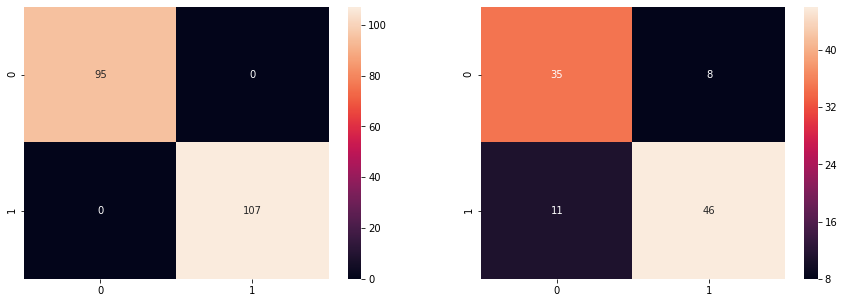

roc curve for Train


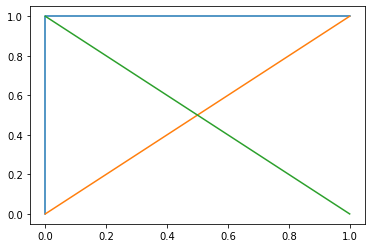

roc curve for Test


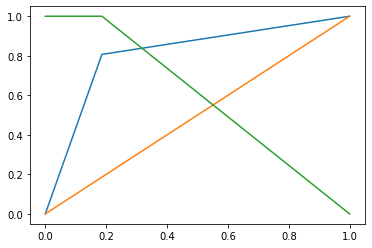

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluation_train_test(dt,X_train,y_train,X_test,y_test)

Train accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.8267326732673267
Test accuracy score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.77
rou_auc_score 0.9040826364977865
rou_auc_score 0.8100775193798448
Train classifi

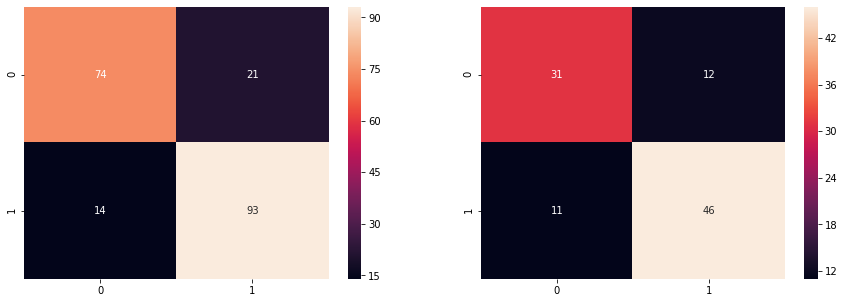

roc curve for Train


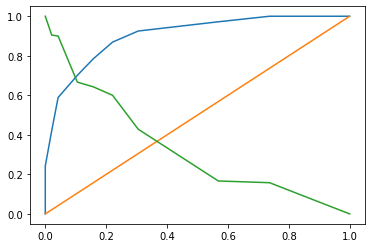

roc curve for Test


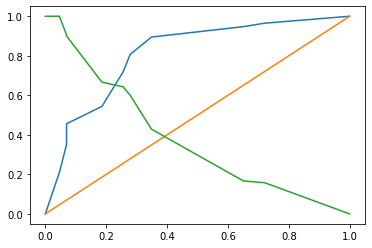

Wall time: 5.15 s


In [34]:
%%time
dt1 =DecisionTreeClassifier()
#modelt =rfctun.fit(X_train,y_train)

from scipy.stats import randint
param_dist = {
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }
rsearchd = RandomizedSearchCV(dt1, param_dist, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearchd.fit(x, y)
rsearchd.best_params_
dt2 =DecisionTreeClassifier(**rsearchd.best_params_)

dt2.fit(X_train,y_train)

evaluation_train_test(dt2,X_train,y_train,X_test,y_test)


# Random forest

Train accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 1.0
Test accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf

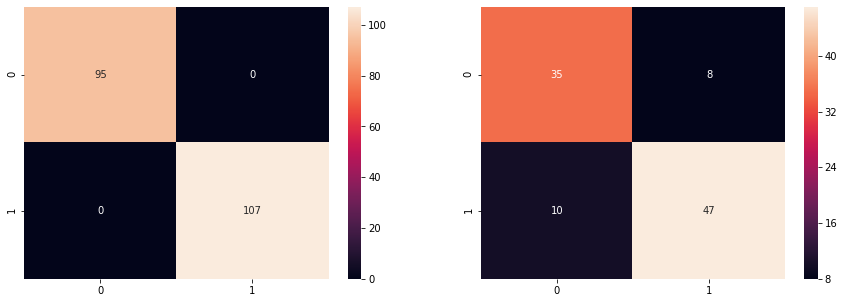

roc curve for Train


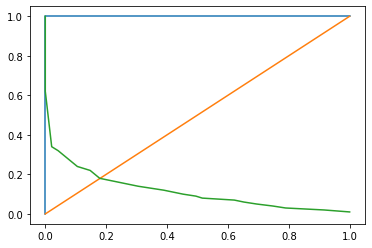

roc curve for Test


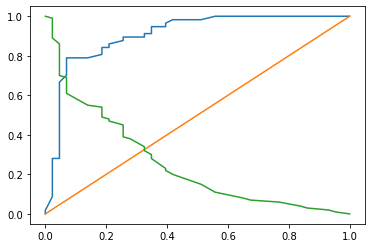

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
evaluation_train_test(rf,X_train,y_train,X_test,y_test)

Train accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=44,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 0.8811881188118812
Test accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf

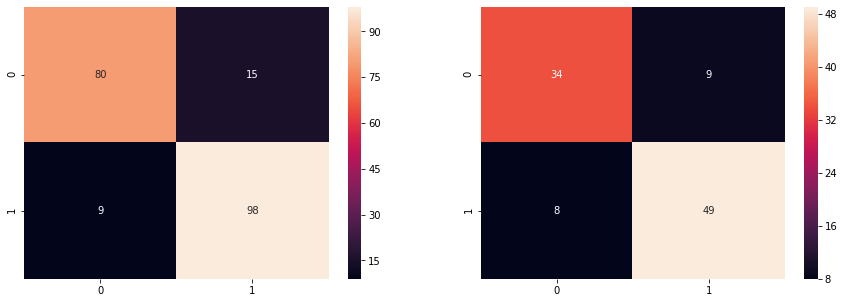

roc curve for Train


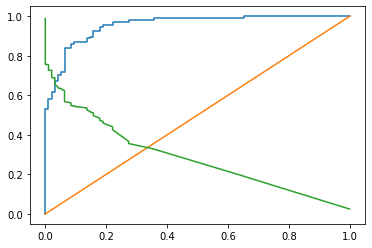

roc curve for Test


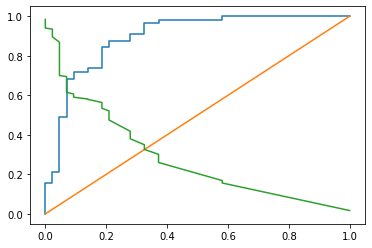

Wall time: 1min 39s


In [36]:
%%time

rfctun = RandomForestClassifier(n_jobs =-1)
#modelt =rfctun.fit(X_train,y_train)

from scipy.stats import randint
param_dist = { 'n_estimators': randint(5,100),
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }
rsearch = RandomizedSearchCV(rfctun, param_dist, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearch.fit(x, y)
rsearch.best_params_
rf1 =RandomForestClassifier(**rsearch.best_params_)
rf1.fit(X_train,y_train)
evaluation_train_test(rf1,X_train,y_train,X_test,y_test)

## Adaboost classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier(random_state=1)

In [38]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Train accuracy score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.9405940594059405
Test accuracy score of  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1) : 0.83
rou_auc_score 0.9943925233644859
rou_auc_score 0.8829049367605059
Train classification report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        95
           1       0.93      0.96      0.94       107

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202

Test classification report 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        43
           1       0.84      0.86      0.85        57

    accuracy                           0.83 

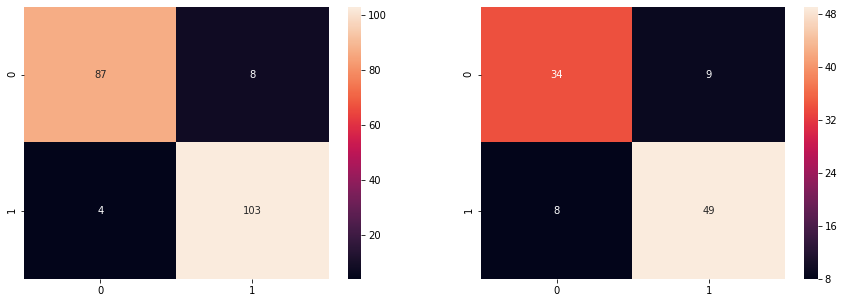

roc curve for Train


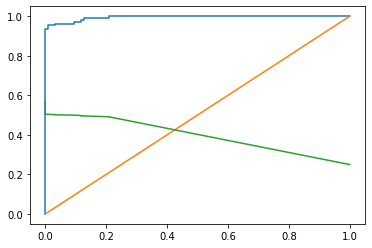

roc curve for Test


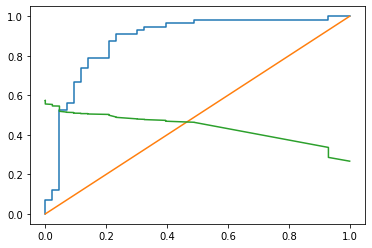

In [39]:
evaluation_train_test(ada,X_train,y_train,X_test,y_test)

## Light GBM

In [40]:
import lightgbm as lgb

In [41]:
lgbc = lgb.LGBMClassifier()

In [42]:
lgbc.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 1.0
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.84
rou_auc_score 1.0
rou

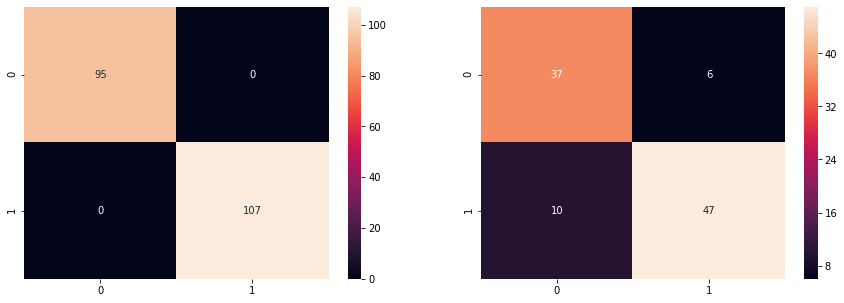

roc curve for Train


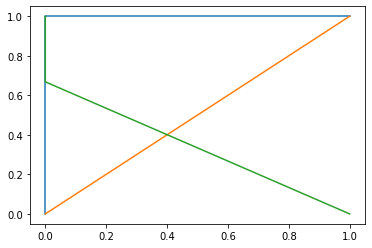

roc curve for Test


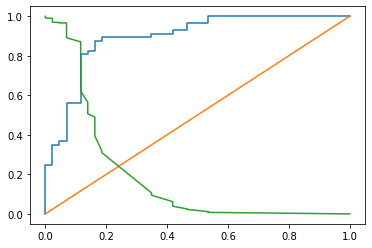

In [43]:
evaluation_train_test(lgbc,X_train,y_train,X_test,y_test)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint
from scipy.stats import uniform
param ={
    'num_leaves':randint(10,50),
    'max_depth':randint(2,15),
    'learning_rate':uniform(0,1),
    'n_estimators':randint(50,200),
    'min_child_samples':randint(2,50)
}
rsearch_lg = RandomizedSearchCV(lgbc,param,cv =3,scoring ='roc_auc',n_jobs=-1,n_iter=200,random_state=1)
rsearch_lg.fit(x,y)
rsearch_lg.best_params_

{'learning_rate': 0.05696439948283272,
 'max_depth': 12,
 'min_child_samples': 41,
 'n_estimators': 81,
 'num_leaves': 47}

In [45]:
lgbcr = lgb.LGBMClassifier(**rsearch_lg.best_params_)

In [46]:
lgbcr.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05696439948283272,
               max_depth=12, min_child_samples=41, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=81, n_jobs=-1, num_leaves=47,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Train accuracy score of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05696439948283272,
               max_depth=12, min_child_samples=41, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=81, n_jobs=-1, num_leaves=47,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0) : 0.8960396039603961
Test accuracy score of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05696439948283272,
               max_depth=12, min_child_samples=41, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=81, n_jobs=-1, num_leaves=47,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_fo

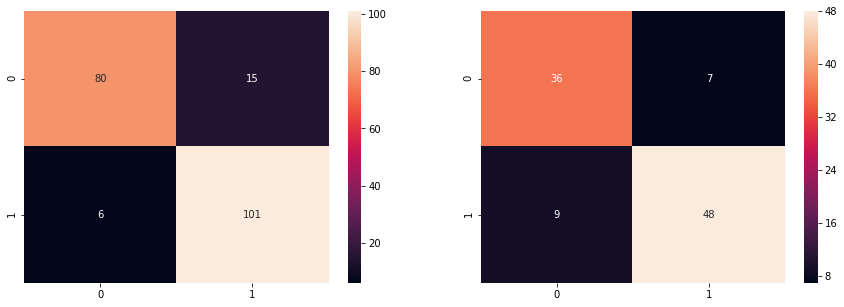

roc curve for Train


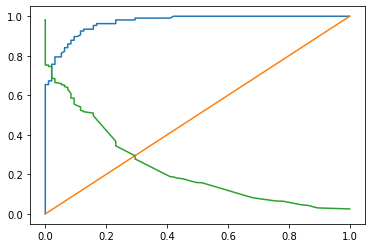

roc curve for Test


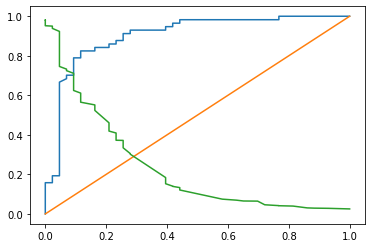

In [47]:
evaluation_train_test(lgbcr,X_train,y_train,X_test,y_test)

## XGBOOST

In [57]:
import xgboost as xgb
xg_cls = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_cls.fit(X_train,y_train)


[22:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Train accuracy score of XGBClassifier(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None) : 0.8564356435643564
Test accuracy score of  XGBClassifier(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_w

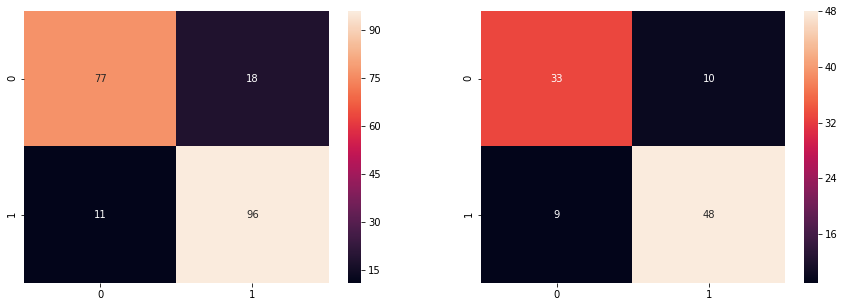

roc curve for Train


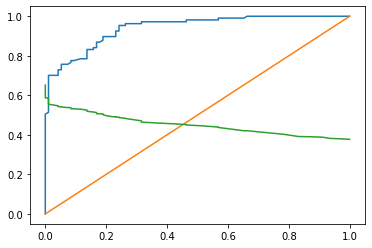

roc curve for Test


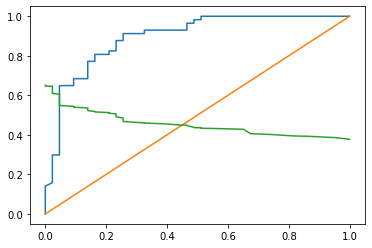

In [58]:
evaluation_train_test(xg_cls,X_train,y_train,X_test,y_test)